In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
plt.rcParams['font.sans-serif']='Microsoft YaHei'
data1=pd.read_excel("附件1.xlsx")
data2=pd.read_excel("附件2.xlsx")
data3=pd.read_excel("附件3.xlsx")
data4=pd.read_excel("附件4.xlsx")



In [75]:
#进行编码对应
data2['品类']=0
sku_category_map_pinlei = dict(zip(data1['单品编码'], data1['分类名称']))
sku_category_map_danpin = dict(zip(data1['单品编码'], data1['单品名称']))

data2['品类']=data2['单品编码'].map(sku_category_map_pinlei)
data2['单品编码']=data2['单品编码'].map(sku_category_map_danpin)


In [77]:
data2['销售日期']=pd.to_datetime(data2['销售日期'])
data2['扫码销售时间']=pd.to_datetime(data2['扫码销售时间'])

In [78]:
data2['扫码销售时间']=pd.to_datetime(data2['扫码销售时间']).dt.strftime('%H:%M:%S')


,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,品类
0,2020-07-01,09:15:07,泡泡椒(精品),0.396,7.6,销售,0.0,4.0
1,2020-07-01,09:17:27,大白菜,0.849,3.2,销售,0.0,1.0
2,2020-07-01,09:17:33,泡泡椒(精品),0.409,7.6,销售,0.0,4.0
3,2020-07-01,09:19:45,上海青,0.421,10.0,销售,0.0,1.0
4,2020-07-01,09:20:23,菜心,0.539,8.0,销售,0.0,1.0


In [79]:
data2['日期时间'] = data2['销售日期'] + pd.to_timedelta(data2['扫码销售时间'])

# 将日期时间列转换为日期时间类型
data2['日期'] = pd.to_datetime(data2['日期时间']).dt.strftime('%Y-%m-%d')
data2['小时'] = pd.to_datetime(data2['日期时间']).dt.strftime('%Y-%m-%d-%H')
data2['季度']=data2['销售日期'].dt.to_period('Q')


,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售,品类,日期时间,日期,小时,季度
0,2020-07-01,09:15:07,泡泡椒(精品),0.396,7.6,销售,0.0,4.0,2020-07-01 09:15:07,2020-07-01,2020-07-01-09,2020Q3
1,2020-07-01,09:17:27,大白菜,0.849,3.2,销售,0.0,1.0,2020-07-01 09:17:27,2020-07-01,2020-07-01-09,2020Q3
2,2020-07-01,09:17:33,泡泡椒(精品),0.409,7.6,销售,0.0,4.0,2020-07-01 09:17:33,2020-07-01,2020-07-01-09,2020Q3
3,2020-07-01,09:19:45,上海青,0.421,10.0,销售,0.0,1.0,2020-07-01 09:19:45,2020-07-01,2020-07-01-09,2020Q3
4,2020-07-01,09:20:23,菜心,0.539,8.0,销售,0.0,1.0,2020-07-01 09:20:23,2020-07-01,2020-07-01-09,2020Q3


In [238]:
#品类根据日期进行统计
pinlei_sell=pd.pivot_table(data2,index=['季度','品类'],values=['销量(千克)'],aggfunc=np.sum)
pinlei_sell=pinlei_sell.unstack()
df_pinlei_jidu=pd.DataFrame(columns=['季度','水生根茎类','花叶类','花菜类','茄类','辣椒类','食用菌'])
for i in range(6):
    df_pinlei_jidu[df_pinlei_jidu.columns[i+1]]=pinlei_sell.loc[:,'销量(千克)'][i].values
df_pinlei_jidu['季度']=data2['季度'].unique()
df_pinlei_jidu.set_index('季度',inplace=True)

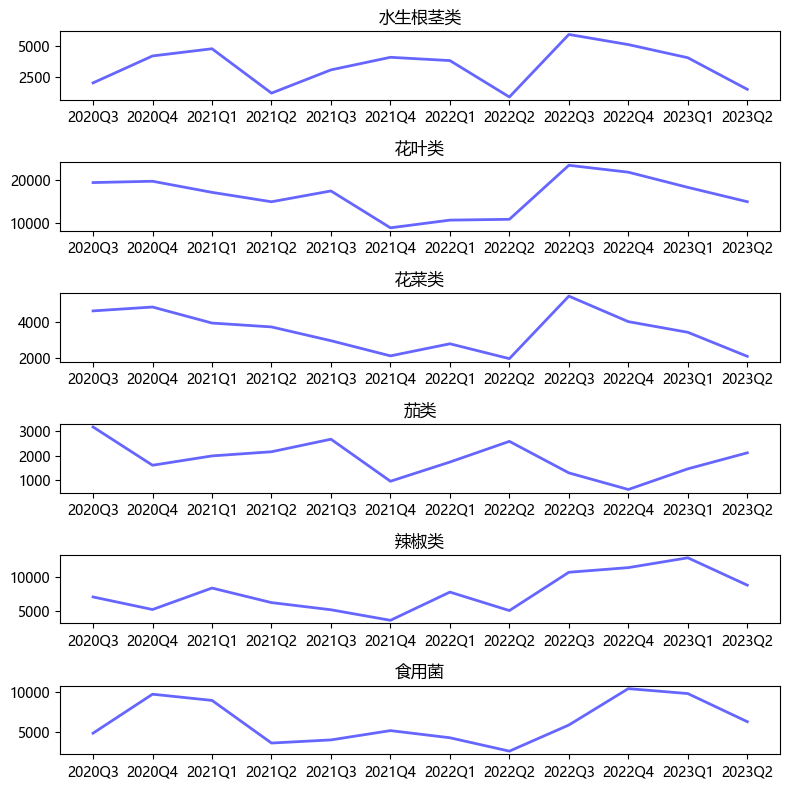

In [239]:
fig,axes=plt.subplots(nrows=6,figsize=(8,8))
for i in range(6):
    axes[i].plot(df_pinlei_jidu.index.astype(str),df_pinlei_jidu.iloc[:,i],ls='-',lw=2,color='b',alpha=0.6)
    axes[i].set_title(df_pinlei_jidu.columns[i])
plt.tight_layout()

In [240]:
pinlei_sell_daily=pd.pivot_table(data2,index=['日期','品类'],values=['销量(千克)'],aggfunc=np.sum)
pinlei_sell_daily=pinlei_sell_daily.unstack()
df_pinlei_daily=pd.DataFrame(columns=['日期','水生根茎类','花叶类','花菜类','茄类','辣椒类','食用菌'])
for i in range(6):
    df_pinlei_daily[df_pinlei_daily.columns[i+1]]=pinlei_sell_daily.loc[:,'销量(千克)'][i].values
df_pinlei_daily['日期']=data2['日期'].unique()
df_pinlei_daily.set_index('日期',inplace=True)

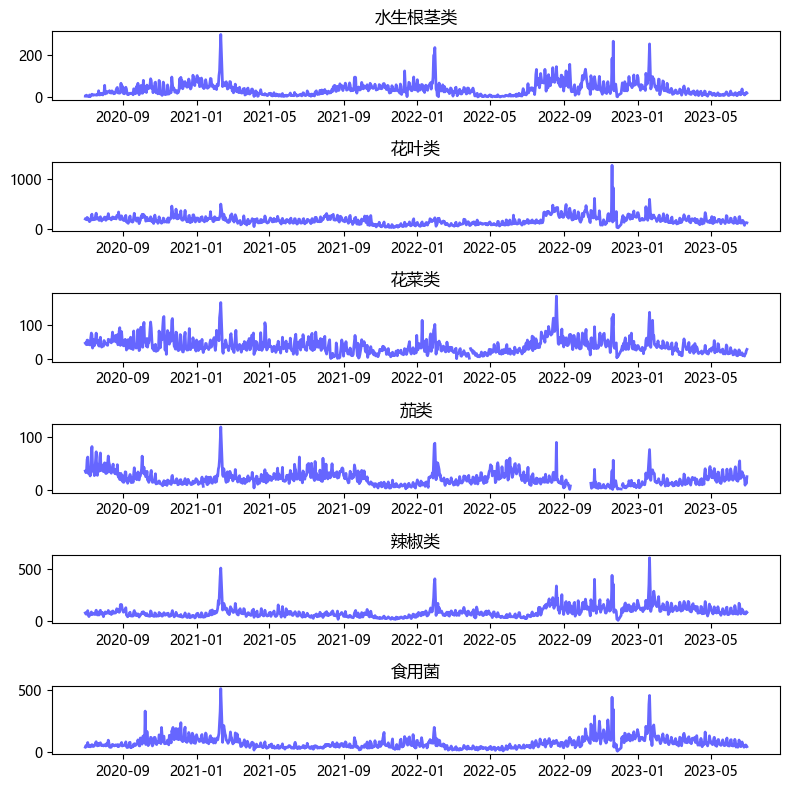

In [274]:
fig,axes=plt.subplots(nrows=6,figsize=(8,8))
for i in range(6):
    axes[i].plot(pd.to_datetime(df_pinlei_daily.index),df_pinlei_daily.iloc[:,i],ls='-',lw=2,color='b',alpha=0.6)
    axes[i].set_title(df_pinlei_daily.columns[i])
plt.tight_layout()


In [334]:
pinlei_corr=df_pinlei_jidu.corr('pearson')

<AxesSubplot:>

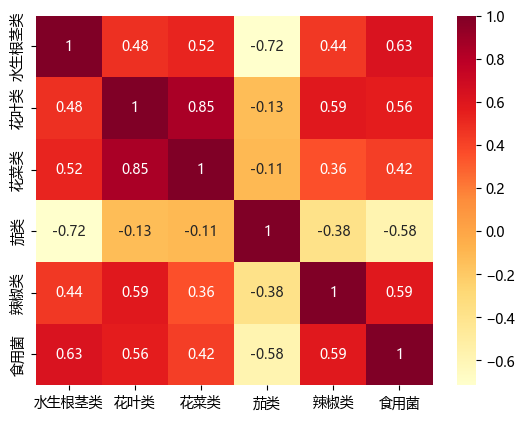

In [335]:
sns.heatmap(pinlei_corr,cmap='YlOrRd',annot=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '花叶类'),
  Text(1, 0, '辣椒类'),
  Text(2, 0, '食用菌'),
  Text(3, 0, '花菜类'),
  Text(4, 0, '水生根茎类'),
  Text(5, 0, '茄类')])

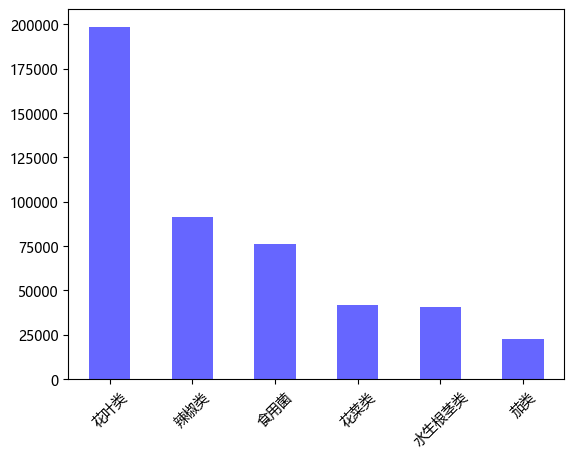

In [255]:
df_pinlei_daily.sum(axis=0).sort_values(ascending=False).plot(kind='bar',alpha=0.6,color='b')
plt.xticks(rotation=45)

Text(0.5, 1.0, '饼状图')

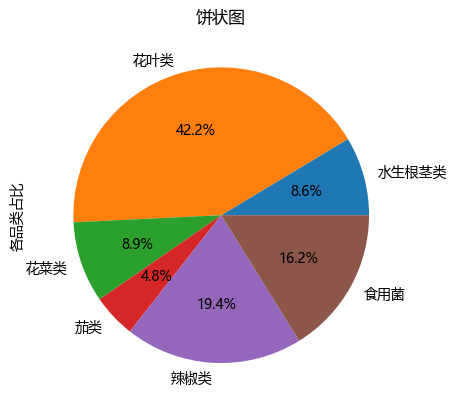

In [284]:
df_pinlei_daily.sum(axis=0).plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('各品类占比')
plt.title('饼状图')

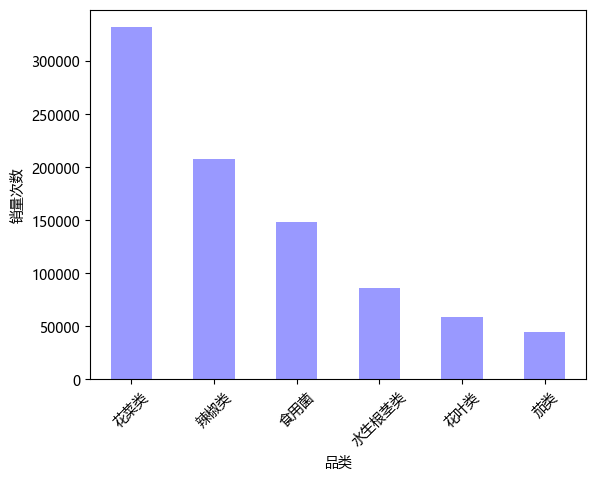

In [246]:
data2['品类'].value_counts().plot(kind='bar',legend=False,color='b',alpha=0.4)
plt.xticks(range(6),['花菜类','辣椒类','食用菌','水生根茎类','花叶类','茄类'],rotation=45)
plt.xlabel('品类')
plt.ylabel('销量次数')
plt.show()

In [290]:
pinlei_describe=df_pinlei_daily.describe()
pinlei_describe.iloc[0,:]=df_pinlei_daily.sum(axis=0)

In [256]:
data2['年月']=data2['销售日期'].dt.strftime('%Y-%m')


In [184]:
sell=data2.groupby(['年月','单品编码'])['销量(千克)'].sum()
sell=pd.DataFrame(sell).unstack()
# sell.to_excel('单品销售.xlsx')

In [185]:
danpin_sell=pd.read_excel("C:\\Users\\15295\\Desktop\\国赛C\\单品销售.xlsx")

,单品编码,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
0,2020-07,32.928,NaN,NaN,452.999,NaN,55.090,NaN,935.567,NaN,...,NaN,NaN,499.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08,14.843,NaN,NaN,702.708,NaN,50.767,NaN,745.185,NaN,...,NaN,NaN,1082.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-09,14.841,NaN,NaN,529.028,NaN,47.205,NaN,319.056,NaN,...,NaN,NaN,646.668,NaN,NaN,NaN,NaN,0.482,NaN,NaN
3,2020-10,14.177,NaN,NaN,256.740,NaN,52.200,NaN,337.648,NaN,...,NaN,NaN,228.933,NaN,NaN,NaN,NaN,0.764,NaN,NaN
4,2020-11,13.523,NaN,NaN,152.065,NaN,24.107,NaN,330.112,NaN,...,NaN,NaN,121.415,NaN,NaN,NaN,NaN,0.616,NaN,NaN


In [186]:
danpin_sell.rename(columns={'单品编码':'日期'},inplace=True)

danpin_sell.iloc[:,0]=pd.to_datetime(danpin_sell.iloc[:,0])
danpin_sell['季度'] = danpin_sell['日期'].dt.to_period('Q')
danpin_sell.set_index('日期',inplace=True)


In [187]:
danpin_sell.fillna(0,inplace=True)


,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜,季度
日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,32.928,0.0,0.0,452.999,0.0,55.090,0.0,935.567,0.0,958.044,...,0.0,499.274,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2020Q3
2020-08-01,14.843,0.0,0.0,702.708,0.0,50.767,0.0,745.185,0.0,905.914,...,0.0,1082.012,0.0,0.0,0.0,0.0,0.000,0.0,0.0,2020Q3
2020-09-01,14.841,0.0,0.0,529.028,0.0,47.205,0.0,319.056,0.0,856.958,...,0.0,646.668,0.0,0.0,0.0,0.0,0.482,0.0,0.0,2020Q3
2020-10-01,14.177,0.0,0.0,256.740,0.0,52.200,0.0,337.648,0.0,689.728,...,0.0,228.933,0.0,0.0,0.0,0.0,0.764,0.0,0.0,2020Q4
2020-11-01,13.523,0.0,0.0,152.065,0.0,24.107,0.0,330.112,0.0,375.571,...,0.0,121.415,0.0,0.0,0.0,0.0,0.616,0.0,0.0,2020Q4


<AxesSubplot:xlabel='日期'>

<Figure size 600x400 with 0 Axes>

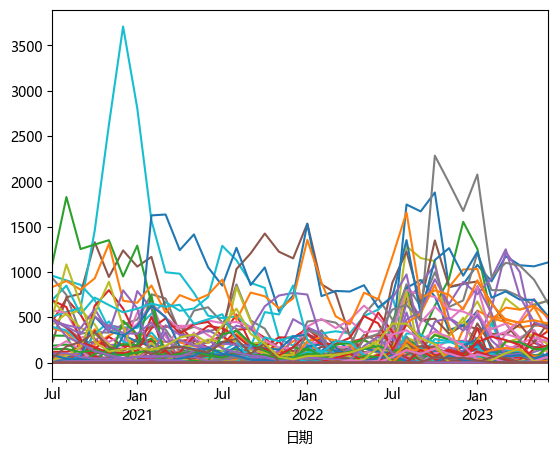

In [294]:
plt.figure(figsize=(6,4))
danpin_sell.plot(legend=False)

In [100]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
season_sell=std.fit_transform(season_sell)
season_sell=pd.DataFrame(season_sell)
season_sell.columns=danpin_sell.columns[:-1]
# season_sell.to_excel('季度数据.xlsx')

In [101]:
from statsmodels.tsa.seasonal import STL
season_trend=pd.DataFrame(columns=danpin_sell.columns)
for i in range(danpin_sell.shape[1]-1):
    stl=STL(danpin_sell.iloc[:,i])
    result=stl.fit()
    season_trend.iloc[:,i]=result.seasonal

In [308]:
(season_trend.loc['变异系数']<1).value_counts()

False    220
True      27
Name: 变异系数, dtype: int64

In [304]:
season_trend.loc['变异系数']=season_sell.std(axis=0)/season_sell.mean(axis=0)

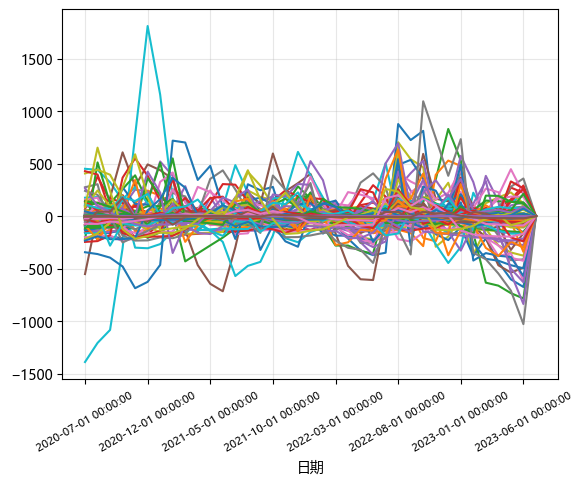

In [302]:
season_trend.plot(legend=False)
plt.xticks(rotation=30,fontsize=8)
plt.grid(True,alpha=0.3)

In [315]:
# data2.groupby(['销售日期','单品编码'])['销量(千克)'].mean().unstack().fillna(0).to_excel('单品每日销售量.xlsx')

<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

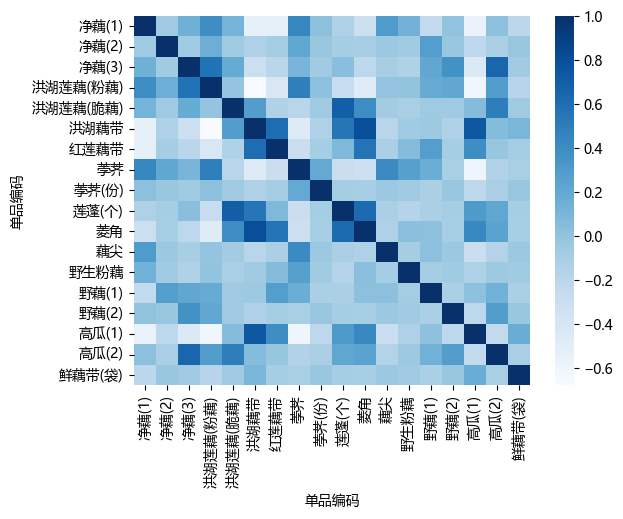

In [327]:
sns.heatmap(data2[data2['品类']==0].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [343]:
corr=data2[data2['品类']==0].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.8077933137908079
对应的两个指标： ('洪湖藕带', '菱角')


<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

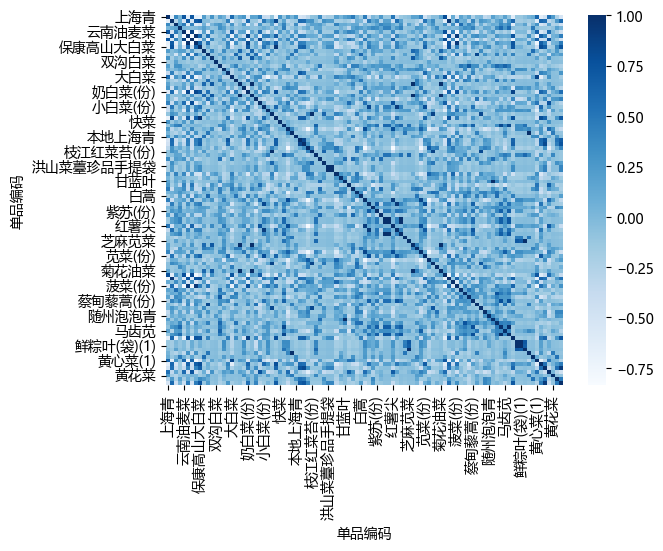

In [328]:
sns.heatmap(data2[data2['品类']==1].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [344]:
corr=data2[data2['品类']==1].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.9983673469387755
对应的两个指标： ('马兰头', '鱼腥草')


<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

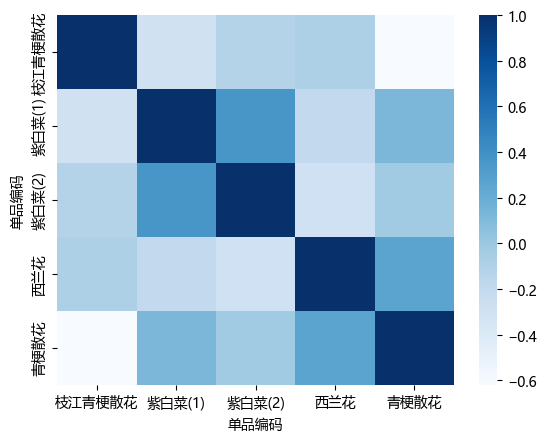

In [329]:
sns.heatmap(data2[data2['品类']==2].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [345]:
corr=data2[data2['品类']==2].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.3652690159195672
对应的两个指标： ('紫白菜(1)', '紫白菜(2)')


<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

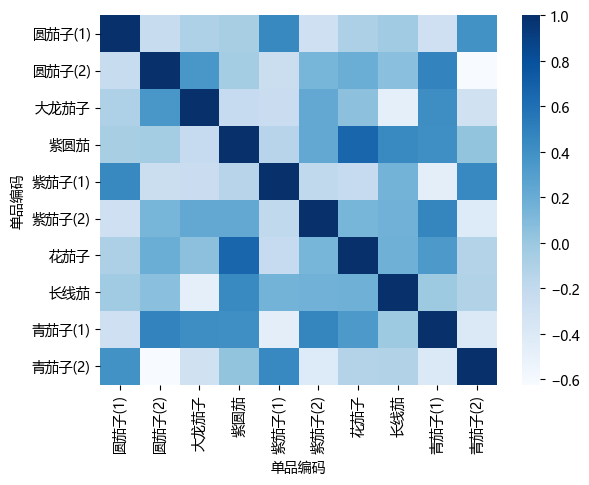

In [330]:
sns.heatmap(data2[data2['品类']==3].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [346]:
corr=data2[data2['品类']==3].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.6584220146066487
对应的两个指标： ('紫圆茄', '花茄子')


<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

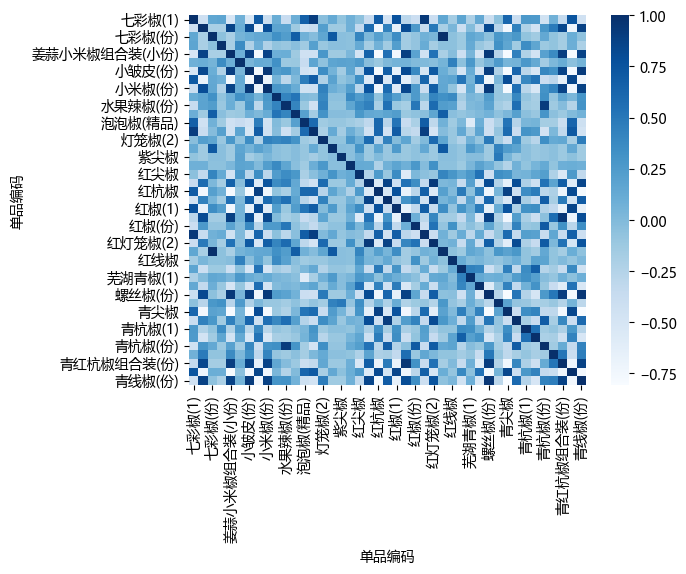

In [331]:
sns.heatmap(data2[data2['品类']==4].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [347]:
corr=data2[data2['品类']==4].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.9469930391030733
对应的两个指标： ('红椒(2)', '青红杭椒组合装(份)')


<AxesSubplot:xlabel='单品编码', ylabel='单品编码'>

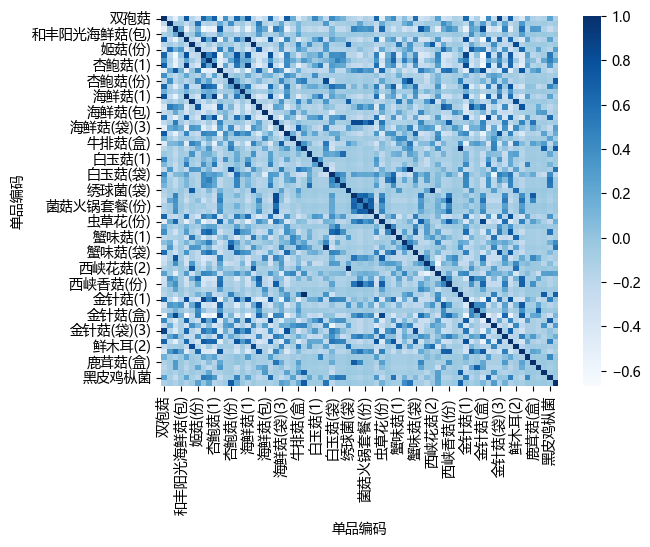

In [332]:
sns.heatmap(data2[data2['品类']==5].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman'),cmap='Blues')

In [348]:
corr=data2[data2['品类']==5].groupby(['年月','单品编码'])['销量(千克)'].sum().unstack().fillna(0).corr('spearman')
corr=corr[corr<1]
max_corr = corr.unstack().idxmax()
max_corr_value = corr.unstack().max()

print("最大相关系数：", max_corr_value)
print("对应的两个指标：", max_corr)

最大相关系数： 0.9983673469387755
对应的两个指标： ('猪肚菇(盒)', '赤松茸(盒)')


'水生根茎类','花叶类','花菜类','茄类','辣椒类','食用菌'

#第二题

In [ ]:
data1=pd.read_excel("附件1.xlsx")
data2=pd.read_excel("附件2.xlsx")
data3=pd.read_excel("附件3.xlsx")
data4=pd.read_excel("附件4.xlsx")
data4.columns=['单品编码','单品名称','损耗率(%)']
merged=pd.merge(data2,data1,on='单品编码')
data3.rename(columns={'日期':'销售日期'},inplace=True)
merged=pd.merge(merged,data3,on=['销售日期','单品编码'])
merged=pd.merge(merged,data4,on=['单品名称','单品编码'])
# merged.to_excel('总表.xlsx')
def pifa_price(data,index):
    num=data[data['分类名称']==index]
    pifa=num.groupby(['销售日期','单品名称'])['批发价格(元/千克)'].mean().unstack()
    pifa.reset_index(inplace=True,drop=True)
    pifa.index=num['销售日期'].unique()
    weight=num.groupby(['销售日期','单品名称'])['销量(千克)'].sum().unstack()
    weight.reset_index(inplace=True,drop=True)
    weight.index=num['销售日期'].unique()
    
    weights=weight/weight.sum(axis=1).values.reshape(len(weight),1)
    
    pifa.fillna(0,inplace=True)
    weights.fillna(0,inplace=True)
    weight_pifa=weights*pifa
    weight_pifa=weight_pifa.sum(axis=1)
    return weight_pifa

weight_hy=pifa_price(merged,'花叶类')
weight_ss=pifa_price(merged,'水生根茎类')
weight_lj=pifa_price(merged,'辣椒类')
weight_sy=pifa_price(merged,'食用菌')
weight_hc=pifa_price(merged,'花菜类')
weight_ql=pifa_price(merged,'茄类')

weight_hy.index=df_pinlei_daily.index
pifa=pd.DataFrame(index=df_pinlei_daily.index,columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])
pifa['茄类']=0
pifa['辣椒类']=weight_lj.values
pifa['花叶类']=weight_hy.values
pifa['水生根茎类']=weight_ss.values
pifa['食用菌']=weight_sy.values
pifa['花菜类']=np.append(weight_hc.values,7.800339)
pifa['茄类']=np.append(weight_ql.values,[0]*35)
merged['周']=pd.to_datetime(data2['销售日期']).dt.to_period('W')
discount=merged[merged['是否打折销售']=='是']
no_discount=merged[merged['是否打折销售']=='否']
discount['单位利润']=(discount['销售单价(元/千克)']-discount['批发价格(元/千克)'])/discount['批发价格(元/千克)']
no_discount['单位利润']=(no_discount['销售单价(元/千克)']-no_discount['批发价格(元/千克)'])/no_discount['批发价格(元/千克)']
cuxiao=discount[['销售日期','单位利润']].groupby('销售日期')['单位利润'].mean()
cuxiao=pd.DataFrame(cuxiao)
(cuxiao['单位利润']<0).value_counts()
feicuxiao=no_discount[['销售日期','单位利润']].groupby('销售日期')['单位利润'].mean()
feicuxiao=no_discount[['销售日期','单位利润']].groupby('销售日期')['单位利润'].mean()
feicuxiao=pd.DataFrame(feicuxiao)
def profit(data,index):
    num=data[data['分类名称']==index]
    profit=num.groupby(['销售日期','单品名称'])['单位利润'].mean().unstack()
    profit.reset_index(inplace=True,drop=True)
    profit.index=num['销售日期'].unique()
    weight=num.groupby(['销售日期','单品名称'])['销量(千克)'].sum().unstack()
    weight.reset_index(inplace=True,drop=True)
    weight.index=num['销售日期'].unique()
    
    weights=weight/weight.sum(axis=1).values.reshape(len(weight),1)
    
    profit.fillna(0,inplace=True)
    weights.fillna(0,inplace=True)
    weight_profit=weights*profit
    weight_profit=pd.DataFrame(weight_profit.sum(axis=1))
    return weight_profit

lj_profit=profit(discount,'辣椒类')
hy_profit=profit(discount,'花叶类')
ss_profit=profit(discount,'水生根茎类')
sy_profit=profit(discount,'食用菌')
hc_profit=profit(discount,'花菜类')
ql_profit=profit(discount,'茄类')
lj_noprofit=profit(no_discount,'辣椒类')
hy_noprofit=profit(no_discount,'花叶类')
ss_noprofit=profit(no_discount,'水生根茎类')
sy_noprofit=profit(no_discount,'食用菌')
hc_noprofit=profit(no_discount,'花菜类')
ql_noprofit=profit(no_discount,'茄类')
def pinlei_price(data,index):
    num=data[data['分类名称']==index]
    profit=num.groupby(['销售日期','单品名称'])['单位利润'].mean().unstack()
    profit.reset_index(inplace=True,drop=True)
    profit.index=num['销售日期'].unique()
    weight=num.groupby(['销售日期','单品名称'])['销量(千克)'].sum().unstack()
    weight.reset_index(inplace=True,drop=True)
    weight.index=num['销售日期'].unique()
    
    weights=weight/weight.sum(axis=1).values.reshape(len(weight),1)
    
    profit.fillna(0,inplace=True)
    weights.fillna(0,inplace=True)
    weight_profit=weights*profit
    weight_profit=pd.DataFrame(weight_profit.sum(axis=1))
    return weight_profit

from sklearn.linear_model import Ridge
df_pinlei_daily=pd.read_excel('每日品类销售量.xlsx')
df_pinlei_daily.set_index('日期',inplace=True)
price_pinlei_avg=pd.read_excel("C:\\Users\\15295\\Desktop\\国赛C\\price处理之后的数据（每个品类及其平均售价）.xlsx",sheet_name=2)
price_pinlei_avg.index=df_pinlei_daily.index
ridge=Ridge()
ridge.fit(df_pinlei_daily[['花叶类']],price_pinlei_avg[['花叶类']])
y_pred=ridge.predict(df_pinlei_daily[['花叶类']])
ridge.score(df_pinlei_daily[['花叶类']],price_pinlei_avg[['花叶类']])
fei_profit_predict=pd.DataFrame(columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])

cuxiao_profit_predict=pd.DataFrame(columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])

fei_profit_predict['花菜类']=[0.8096795465116929,0.8096795465116929,0.8096795465116929,0.8096795465116929,0.8096795465116929,0.8096795465116929,0.8096795465116929]
fei_profit_predict['花叶类']=[0.6195542598092934,0.6078762444696628,0.6051610413590741,0.6044672146044581,0.6042292673515062,0.6040941342624895,0.6039821887751682]
fei_profit_predict['辣椒类']=[0.8970395417702565,0.891689387262164,0.8955465904400541,0.8953360567317866,0.8958906769186115,0.8960316717162065,0.8962307161806662]
fei_profit_predict['水生根茎类']=[0.6019731918219435,0.6056976302149741,0.6056976302149741,0.6056976302149741,0.6056976302149741,0.6056976302149741,0.6056976302149741]
fei_profit_predict['食用菌']=[0.5548861912600662,0.5666790486368983,0.5773969930286178,0.5871380022101303,0.5959911233317161,0.6040372869409467,0.611350046806917]
fei_profit_predict['茄类']=[0.7431333139945259,0.7431333139945259,0.7431333139945259,0.7431333139945259,0.7431333139945259,0.7431333139945259,0.7431333139945259]

cuxiao_profit_predict['花菜类']=[0.10287226635261931,0.01944135534494139,-0.01540916331988263,-0.04658352636903487,-0.0588496497920156,-0.0711288971392918,-0.07593685136398584]
cuxiao_profit_predict['花叶类']=[0.08772642317909835,0.07319920527842864,0.07171188484426524,0.0712484092353391,0.07086532215928736,0.07048854689539542,0.07011226721179731]
cuxiao_profit_predict['辣椒类']=[0.23069582950999074,0.2576629465682867,0.28326959615017927,0.29087294588356527,0.2954502919716165,0.2969075417391363,0.2974304187385387]
cuxiao_profit_predict['水生根茎类']=[-0.07568559874842862,-0.07711540956264566,-0.0785452203768627,-0.07997503119107975,-0.0814048420052968,-0.08283465281951384,-0.08426446363373088]
cuxiao_profit_predict['食用菌']=[-0.02533460234536135,-0.011730759121025277,0.0009241101025195264,0.012696203651681792,0.02364710200410341,0.03383408991957104,0.04331045609978816]
cuxiao_profit_predict['茄类']=[0.417165669,0.428571429,0.595744681,0.643835616,0.578947368,0.714285714,0.595744681]

predict_pifa=pd.DataFrame(columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])
predict_pifa['花叶类']=[3.255842753045860,3.237667151288399,3.272059509154256,3.292556176070791,3.281119988678845,3.247952839211543,3.228343151401837]
predict_pifa['花菜类']=[7.814691653330113,7.814691653330113,7.814691653330113,7.814691653330113,7.814691653330113,7.814691653330113,7.814691653330113]
predict_pifa['水生根茎类']=[12.526673310306618,12.572942489800601,12.587349387827375,12.598766409719978,12.609906104571088,12.621028068784087,12.632157197989116]
predict_pifa['茄类']=[4.674462064661686,4.710661164497932,4.741055184435122,4.710814803302956,4.751304993969731,4.760794055956869,4.679135088742765]
predict_pifa['辣椒类']=[3.686702969487563,3.686702969487563,3.686702969487563,3.686702969487563,3.686702969487563,3.686702969487563,3.686702969487563]
predict_pifa['食用菌']=[3.867845960533493,3.686294787031217,3.705973987924511,3.698396267477442,3.692295507750555,3.695195957915140,3.700473235714608]

predict_price_feicuxiao=(fei_profit_predict+1)*predict_pifa
predict_price_cuxiao=(cuxiao_profit_predict+1)*predict_pifa

predict_sales=pd.DataFrame(columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])#预测销量

predict_sales['水生根茎类']=[21.43,20.00,20.95,20.62,20.99,20.97,21.16]
predict_sales['花叶类']=[132.49,126.54,126.64,139.87,148.14,140.90,142.94]
predict_sales['花菜类']=[23.42,21.89,20.88,21.95,22.95,23.68,24.83]
predict_sales['茄类']=[22.15,22.10,20.18,21.07,19.54,21.15,19.94]
predict_sales['辣椒类']=[79.63,80.21,80.50,82.17,81.81,84.43,86.33]
predict_sales['食用菌']=[43.14,46.18,49.58,53.97,53.39,52.72,50.83]

sunhao=pd.DataFrame(merged.groupby('分类名称')['损耗率(%)'].mean())
cuxiao_ratio=pd.DataFrame(columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'])

cuxiao_ratio['辣椒类']=[3.5543952768322464]
cuxiao_ratio['花叶类']=[5.0251831501831505]
cuxiao_ratio['水生根茎类']=[9.874332872951728]
cuxiao_ratio['食用菌']=[7.880127203147739]
cuxiao_ratio['花菜类']=[5.366755226983944]
cuxiao_ratio['茄类']=[2.579179473473206]

cuxiao_ratio=cuxiao_ratio/100#促销率

cuxiao_data=np.array([[0.24880767, 0.35176282, 0.6912033 , 0.5516089 , 0.37567287,
        0.18054256]]*7)
cuxiao_ratio=pd.DataFrame(data=cuxiao_data,columns=cuxiao_ratio.columns)

sunhao_data=np.array([[7.755571,12.733681,8.911259,8.884176,10.664638,6.411989 ]]*7)
sunhao=pd.DataFrame(data=sunhao_data,columns=cuxiao_ratio.columns)/100
min_value=[10.384, 80.524,  8.083,  8.415, 67.12 , 35.271]
max_value=[ 22.945, 128.495,  28.087,  28.369,  94.187,  54.18 ]

import numpy as np
import pandas as pd

# 定义遗传算法的参数
population_size = 200  # 种群大小
num_generations = 300  # 迭代次数
mutation_rate = 0.001  # 变异率

# 定义决策变量的维度
num_rows = 7
num_cols = 6

#定义一些基础的定量
feicuxiao_price=predict_price_feicuxiao#非促销价格
cuxiao_price=predict_price_cuxiao#促销价格
pifa_price=predict_pifa#批发价格
predict_sales=predict_sales#预测的总销量
cuxiao_ratio=cuxiao_ratio#促销率
sunhao=sunhao#损耗率
# 初始化种群
def initialize_population():
    population = []
    for _ in range(population_size):
        min_value=[67.14, 120.524,  10.384,  35.271, 8.803 , 8.415]
        max_value=[94.187, 161.495,  22.945, 54.180 , 28.087 ,  28.369 ]
        min_value_df2=[2.38642099, 4.04647848, 1.02535073, 2.77939967, 0.47243546,0.21703795]
        max_value_df2=[3.34777828, 8.11541953, 2.26566568, 4.26945292, 1.50736054,0.73168742]
        decision_variable1 = np.random.uniform(min_value,max_value,(num_rows,num_cols))
        decision_variable2 = np.random.uniform(min_value_df2,max_value_df2,(num_rows,num_cols))
        population.append((decision_variable1, decision_variable2))
    return population

# 计算适应度值
def fitness_function(decision_variable1, decision_variable2):
    feicuxiao_price=predict_price_feicuxiao
    cuxiao_price=predict_price_cuxiao
    pifa_price=predict_pifa
    # 初始化种群
    df1=decision_variable1
    df2=decision_variable2
    if df1.sum(axis=1).sum() >= 2483.88 or not np.all(df1>df2):
        return 0
    
    
    col_sum = (feicuxiao_price * (predict_sales - df2)).sum(axis=1).sum() + (cuxiao_price * df2).sum(axis=1).sum() + (pifa_price * df1).sum(axis=1).sum()
    return col_sum
    

# 选择操作，使用轮盘赌选择
def selection(population):
    fitness_values = []
    for individual in population:
        decision_variable1, decision_variable2 = individual
        fitness_value = fitness_function(decision_variable1, decision_variable2)
        fitness_values.append(fitness_value)
    fitness_sum = np.nansum(fitness_values)
    probabilities = np.array(fitness_values) / fitness_sum
    selected_indices = np.random.choice(len(population), size=population_size, replace=True, p=probabilities)
    selected_population = [population[i] for i in selected_indices]
    return selected_population

# 交叉操作，采用单点交叉
def crossover(parent1, parent2):
    decision_variable1_parent1, decision_variable2_parent1 = parent1
    decision_variable1_parent2, decision_variable2_parent2 = parent2
    crossover_point = np.random.randint(0, num_rows*num_cols)
    decision_variable1_child = np.concatenate((decision_variable1_parent1[:crossover_point], decision_variable1_parent2[crossover_point:]))
    decision_variable2_child = np.concatenate((decision_variable2_parent2[:crossover_point], decision_variable2_parent1[crossover_point:]))
    return decision_variable1_child, decision_variable2_child

# 变异操作，每个基因按照变异率进行变异
def mutation(individual):
    decision_variable1, decision_variable2 = individual
    for i in range(num_rows):
        for j in range(num_cols):
            if np.random.rand() < mutation_rate:
                decision_variable1[i][j] = np.random.uniform(1,50)
                decision_variable2[i][j] = np.random.uniform(1,50)
    return decision_variable1, decision_variable2

# 主程序
def genetic_algorithm():
    population = initialize_population()
    best_fitness = None
    
    for generation in range(num_generations):
        # 选择操作
        selected_population = selection(population)
        
        # 交叉操作，生成新的子代
        children = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i+1]
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            children.extend([child1, child2])
        
        # 变异操作
        mutated_population = [mutation(child) for child in children]
        
        # 更新种群
        population = selected_population + mutated_population
        
        # 计算当前迭代的最佳适应度值
        fitness_values = [fitness_function(decision_variable1, decision_variable2) for (decision_variable1, decision_variable2) in population]
        best_fitness = np.max(fitness_values)
        
        # 打印最佳适应度值
        best_individual = population[np.argmax(fitness_values)]
    
    return best_fitness, best_individual,fitness_values

# 运行遗传算法
# 运行遗传算法
best_fitness, best_individual ,fitness_values= genetic_algorithm()
print(f"Best fitness found: {best_fitness}")

# 提取最优个体的矩阵结果
best_decision_variable1, best_decision_variable2 = best_individual

# 输出两个矩阵的结果
print("Best decision_variable1:")
print(best_decision_variable1)
print("Best decision_variable2:")
print(best_decision_variable2)

# 绘制迭代过程中适应度值的变化
plt.rcParams['font.sans-serif']='KaiTi'
plt.plot(fitness_values)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Genetic Algorithm")
plt.show()

jinhuo=pd.DataFrame(best_decision_variable1,columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'],index=pd.date_range('2023-07-01','2023-07-07'))
cuxiaojinhuo=pd.DataFrame(best_decision_variable2,columns=['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'],index=pd.date_range('2023-07-01','2023-07-07'))


#第三问

In [ ]:
data=pd.read_excel("C:/Users/15295/Desktop/国赛C/6.24-6.30.xlsx")#6-24到6-30
data2=pd.read_excel("C:/Users/15295/Desktop/国赛C/附件1.xlsx")
sku_category_map_danpin = dict(zip(data2['单品编码'], data2['单品名称']))
sku_category_map_pinlei = dict(zip(data2['单品编码'], data2['分类名称']))
data['品类']=data['单品编码'].map(sku_category_map_pinlei)
data['单品名称']=data['单品编码'].map(sku_category_map_danpin)

pifa=pd.read_excel("C://Users//15295//Desktop//国赛C/6.24-6.30批发价格.xlsx")
sunhao=pd.read_excel("C:\\Users\\15295\\Desktop\\国赛C\\附件4.xlsx")
data=pd.merge(data,pifa,on=['销售日期','单品编码'])
data=pd.merge(data,sunhao,on=['单品编码','单品名称'])
data['收益']=(data['销售单价(元/千克)']-data['批发价格(元/千克)'])/data['批发价格(元/千克)']
shouyi=data.groupby('单品名称')['收益'].mean()
xuqiu=data.groupby('单品名称')['销量(千克)'].sum()
haosun=data.groupby('单品名称')['损耗率(%)'].mean()
evaluate=pd.DataFrame(columns=['收益','需求量','损耗率'],index=haosun.index)
evaluate['收益']=shouyi.values
evaluate['需求量']=xuqiu.values
evaluate['损耗率']=haosun.values/10
evaluate['损耗率']=evaluate['损耗率'].max()-evaluate['损耗率']

#topsis
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler




#topsis
def entropyweight(data):#数据要是经过处理的数据
    P=data/data.sum(axis=0)
    E=np.nansum(-P*np.log(P)/np.log(len(data)),axis=0)
    
    #计算权系数
    return (1-E)/np.sum(1-E)


def topsis(old_data):#数据是经历过处理的数据
    min_max_scaler=MinMaxScaler()
    data=pd.DataFrame(min_max_scaler.fit_transform(old_data))
    Z=pd.DataFrame([data.min(),data.max()],index=['负理想解','正理想解'])
    
    weight=entropyweight(data)
    Result=data.copy()
    Result['正理想解']=np.sqrt(((data-Z.loc['正理想解'])**2*weight).sum(axis=1))
    Result['负理想解']=np.sqrt(((data-Z.loc['负理想解'])**2*weight).sum(axis=1))
    
    Result['综合得分指数']=Result['负理想解']=(Result['负理想解']+Result['正理想解'])
    Result.index=old_data.index
    return Result,Z,weight


Result,Z,weight=topsis(evaluate)
map_pinlei=dict(zip(data['单品名称'],data['品类']))
Result['品类']=Result.index.map(map_pinlei)

selected=Result.sort_values('综合得分指数',ascending=False).reset_index()[:33]
predict=pd.read_excel("C:\\Users\\15295\\Desktop\\国赛C\\灰色预测量汇总.xlsx")
predict.set_index('类型',inplace=True)
predict.loc['促销率']=np.array(selected['促销率'])

cuxiao_profit=np.random.uniform(-0.16,0.16,33)

import numpy as np
import matplotlib.pyplot as plt

# 定义遗传算法的参数
population_size = 50  # 种群大小
num_generations = 100  # 迭代次数
mutation_rate = 0.001  # 变异率

# 定义决策变量的维度
num_cols = 33



# 初始化种群
def initialize_population():
    population = []
    for _ in range(population_size):
        min_value =[2.5]*33
        max_value = [58.   ,  3   ,  3,  3.   ,  4.   ,  3   , 11.187,  3,
        2.365,  3   ,  7.098,  3,  3,  4.232,  4.   ,  3.403,
       26.   ,  3.95 , 13.   ,  4.   ,  3,  8.789,  7.036, 13.   ,
        7.656,  4.112,  7.971,  7.056, 19.   ,  7.81 , 26.   , 10.052,
        9.   ]
        decision_variable = np.random.uniform(min_value, max_value, (1,num_cols))
        population.append(decision_variable)
    return population

# 计算适应度值
def fitness_function(decision_variable):
    # 初始化种群
    df1 = pd.DataFrame(decision_variable)
    df1.columns=predict.columns
    
    col_sum=predict.loc['利润']*predict.loc['批发价']*df1.iloc[0,:]*(1-predict.loc['促销率'])+predict.loc['促销率']*cuxiao_profit*predict.loc['批发价']*df1.iloc[0,:]
    col_sum=np.array(col_sum).sum()
    
    return col_sum

# 选择操作，使用轮盘赌选择
def selection(population):
    fitness_values = [fitness_function(individual) for individual in population]
    fitness_sum = np.sum(fitness_values)
    probabilities = np.array(fitness_values) / fitness_sum
    selected_indices = np.random.choice(len(population), size=population_size, replace=True, p=probabilities)
    selected_population = [population[i] for i in selected_indices]
    return selected_population

# 交叉操作，采用单点交叉
def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, num_cols)
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

# 变异操作，每个基因按照变异率进行变异
def mutation(individual):
    for i in range(num_cols):
        if np.random.rand() < mutation_rate:
            individual[0][i] = np.random.uniform(2.5, 30)
    return individual

# 主程序
def genetic_algorithm():
    population = initialize_population()
    best_fitness = None
    
    for generation in range(num_generations):
        # 选择操作
        selected_population = selection(population)
        
        # 交叉操作，生成新的子代
        children = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i+1]
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            children.extend([child1, child2])
        
        # 变异操作
        mutated_population = [mutation(child) for child in children]
        
        # 更新种群
        population = selected_population + mutated_population
        
        # 计算当前迭代的最佳适应度值
        fitness_values = [fitness_function(individual) for individual in population]
        best_fitness = np.max(fitness_values)
        
        # 打印最佳适应度值
        best_individual = population[np.argmax(fitness_values)]
    
    return best_fitness, best_individual, fitness_values

# 运行遗传算法
best_fitness, best_individual, fitness_values = genetic_algorithm()
print(f"Best fitness found: {best_fitness}")

# 输出最优个体的矩阵结果
best_decision_variable = best_individual

# 输出最优决策变量
print("Best decision_variable:")
print(best_decision_variable)

# 绘制迭代过程中适应度值的变化
plt.rcParams['font.sans-serif'] = 'KaiTi'
plt.plot(fitness_values)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Genetic Algorithm")
plt.show()

